## CAPSTONE PROJECT - CLUSTERING

#### IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn .preprocessing import MinMaxScaler

# For Outlier
from scipy.stats import chi2
from matplotlib import patches
import statistics

#### READ DATASET

In [2]:
from google.colab import drive
drive.mount('/content/gddrive')

Mounted at /content/gddrive


In [3]:
path = '/content/gddrive/MyDrive/Data Narasio Google Colab/'

data = path + 'Superstore_.csv'

df = pd.read_csv(data, encoding ='latin1', sep = ";")

df.head()

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,419.136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.582
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,68.714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9.575.775,5,0.45,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.20,25.164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              9994 non-null   int64  
 1   ID_pesanan         9994 non-null   object 
 2   Tanggal_pesan      9994 non-null   object 
 3   Tanggal_kirim      9994 non-null   object 
 4   Metode_pengiriman  9994 non-null   object 
 5   ID_pelanggan       9994 non-null   object 
 6   Nama_pelanggan     9994 non-null   object 
 7   Segmen_pelanggan   9994 non-null   object 
 8   Kota               9994 non-null   object 
 9   Negara             9994 non-null   object 
 10  Kode_pos           9994 non-null   int64  
 11  Wilayah            9994 non-null   object 
 12  ID_produk          9994 non-null   object 
 13  Kategori           9994 non-null   object 
 14  Sub_kategori       9994 non-null   object 
 15  Nama_produk        9994 non-null   object 
 16  Penjualan          9994 

In [ ]:
df.describe()

,Index,Kode_pos,Kuantitas,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,3.789574,0.156203
std,2885.163629,32063.693350,2.225110,0.206452
min,1.000000,1040.000000,1.000000,0.000000
25%,2499.250000,23223.000000,2.000000,0.000000
50%,4997.500000,56430.500000,3.000000,0.200000
75%,7495.750000,90008.000000,5.000000,0.200000
max,9994.000000,99301.000000,14.000000,0.800000


#### PROBLEM STATEMENT

Superstore ingin memberikan promo kepada pelanggannya, sehingga harus dilakukan suatu analisis dari data. Analisis RFM digunakan untuk mengelompokkan pelanggan menjadi 3 kelompok, yaitu pelanggan Silver, Gold, dan Platinum. 

- Pelanggan Silver adalah kelompok pelanggan yang jarang berbelanja dan mengeluarkan sedikit uang untuk berbelanja. 

- Pelanggan Gold adalah kelompok pelanggan di antara pelanggan Silver dan Platinum

- Pelanggan Platinum adalah kelompok pelanggan yang sering berbelanja dan mengeluarkan uang yang besar untuk berbelanja. 

Ketiga pengelompokkan pelanggan di atas berhubungan dengan pemberian promo, mana pelanggan yang akan diberi promo besar, sedang, atau kecil. 

Berarti:
- Pelanggan Silver mendapatkan promo kecil
- Pelanggan Gold mendapatkan promo sedang
- Pelanggan Platinum mendapatkan promo besar

#### EDA

Masih ada kolom yang berisi data numerik namun data type nya belum berupa float maupun integer. 

In [5]:
#convert numeric string column to float
df['Penjualan'] = df['Penjualan'].apply(lambda x: float(x.split()[0].replace('.', '')))
df['Untung'] = df['Untung'].apply(lambda x: float(x.split()[0].replace('.', '')))

In [ ]:
df.sort_values(by='Penjualan', ascending=False).head()

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
399,400,CA-2016-108987,09/08/2016,09/10/2016,Second Class,AG-10675,Anna Gayman,Consumer,Houston,Texas,77036,Central,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",23962656.0,4,0.32,-3171528.0
5055,5056,CA-2015-141243,01/03/2015,01/08/2015,Second Class,AH-10465,Amy Hunt,Consumer,Dallas,Texas,75217,Central,FUR-BO-10003272,Furniture,Bookcases,O'Sullivan Living Dimensions 5-Shelf Bookcases,13523976.0,9,0.32,-4375404.0
8781,8782,CA-2015-133585,03/01/2015,03/04/2015,First Class,CM-12715,Craig Molinari,Corporate,Houston,Texas,77070,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",12279984.0,6,0.32,-361176.0
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199968.0,4,0.20,39199888.0
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.0,5,0.45,-383031.0


In [ ]:
df.describe()

,Index,Kode_pos,Penjualan,Kuantitas,Discount,Untung
count,9994.000000,9994.000000,9.994000e+03,9994.000000,9994.000000,9.994000e+03
mean,4997.500000,55190.379428,1.132271e+05,3.789574,0.156203,1.800957e+05
std,2885.163629,32063.693350,5.186212e+05,2.225110,0.206452,1.722971e+06
min,1.000000,1040.000000,3.000000e+00,1.000000,0.000000,-3.839990e+07
25%,2499.250000,23223.000000,2.516000e+03,2.000000,0.000000,2.245000e+03
50%,4997.500000,56430.500000,1.108800e+04,3.000000,0.200000,3.630900e+04
75%,7495.750000,90008.000000,5.399175e+04,5.000000,0.200000,1.509840e+05
max,9994.000000,99301.000000,2.396266e+07,14.000000,0.800000,6.719981e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              9994 non-null   int64  
 1   ID_pesanan         9994 non-null   object 
 2   Tanggal_pesan      9994 non-null   object 
 3   Tanggal_kirim      9994 non-null   object 
 4   Metode_pengiriman  9994 non-null   object 
 5   ID_pelanggan       9994 non-null   object 
 6   Nama_pelanggan     9994 non-null   object 
 7   Segmen_pelanggan   9994 non-null   object 
 8   Kota               9994 non-null   object 
 9   Negara             9994 non-null   object 
 10  Kode_pos           9994 non-null   int64  
 11  Wilayah            9994 non-null   object 
 12  ID_produk          9994 non-null   object 
 13  Kategori           9994 non-null   object 
 14  Sub_kategori       9994 non-null   object 
 15  Nama_produk        9994 non-null   object 
 16  Penjualan          9994 

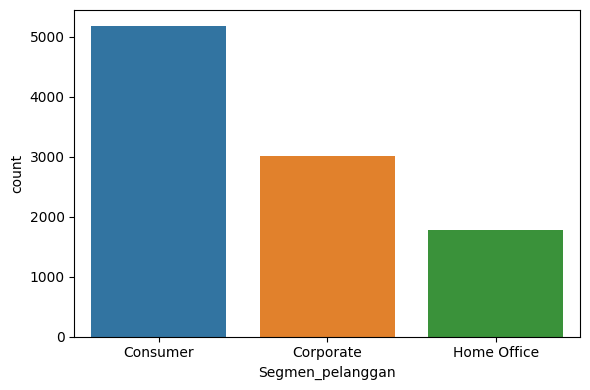

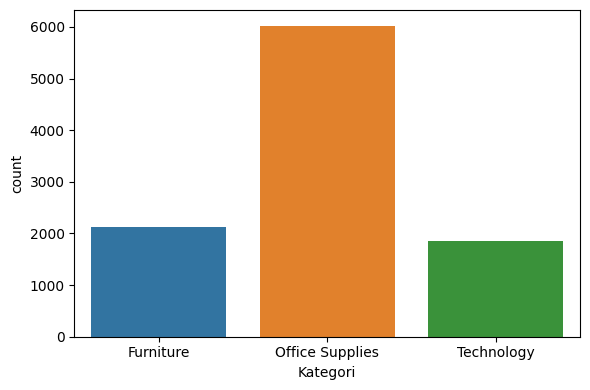

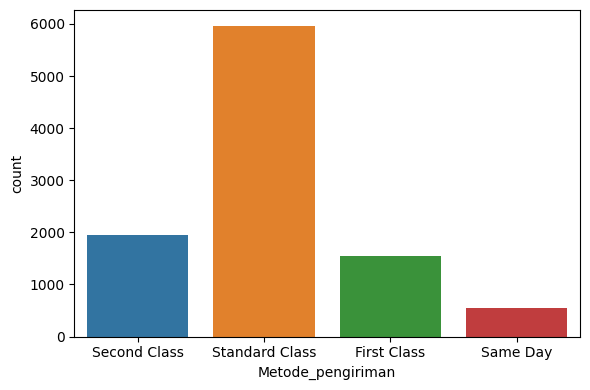

In [6]:
# Melihat perbandingan data kategori disetiap kolom

# Kolom kategori yang ingin dilihat :
categorical = ['Segmen_pelanggan', 'Kategori', 'Metode_pengiriman']

for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.tight_layout()

Dari bar chart di atas, kita bisa lihat bahwa pelanggan terbanyak ada pada konsumer tunggal. Kemudian produk terbanyak yang dibeli adalah produk kebutuhan kantor. Lalu metode pengirimian paling banyak ada pada di standard class. 

<Axes: >

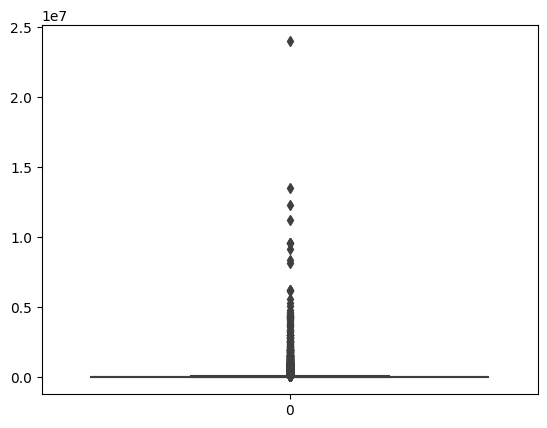

In [7]:
# Persebaran jumlah penjualan 
sns.boxplot(df['Penjualan'])

<Axes: >

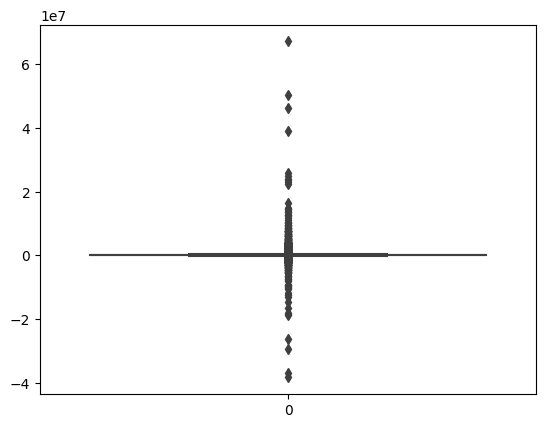

In [8]:
# Persebaran jumlah Untung 
sns.boxplot(df['Untung'])

<Axes: >

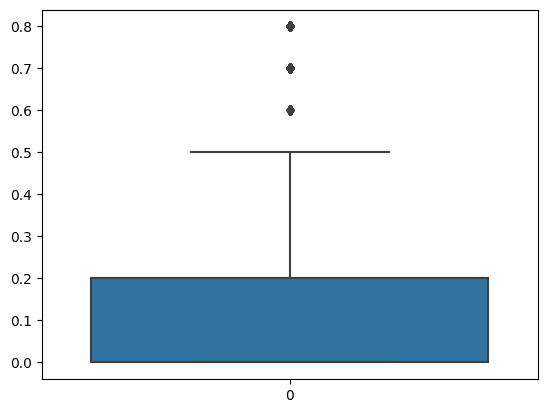

In [9]:
# Persebaran jumlah Discount 
sns.boxplot(df['Discount'])

<Axes: >

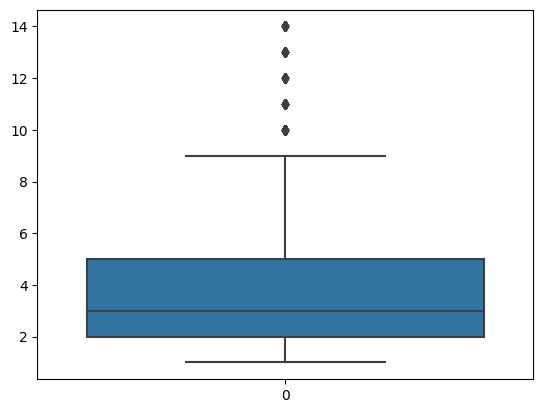

In [10]:
# Persebaran jumlah Kuantitas 
sns.boxplot(df['Kuantitas'])

Untuk mengatasi outlier, mari kita cari korelasi antar variabelnya

<ipython-input-13-18d651983c8b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)


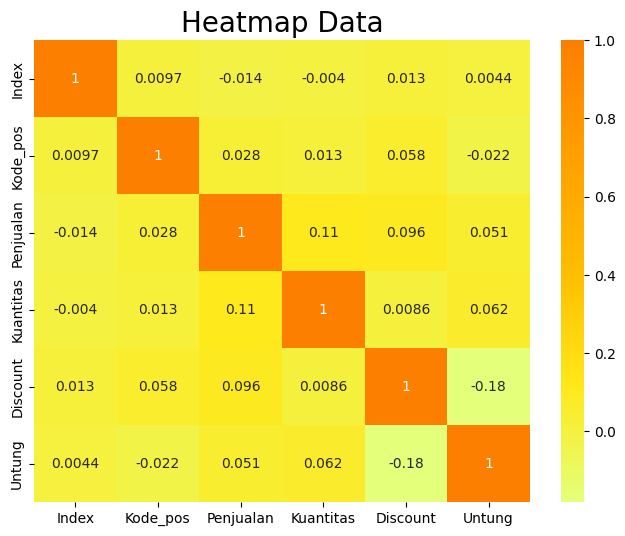

In [ ]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

Dari grafik heatmap korelasi di atas, kita mengetahui bahwa Kolom Penjualan dan Kolom Untung memiliki korelasi yang kecil yaitu sekitar 0.051

#### DATA PRE-PROCESSING

In [ ]:
# cek missing value
df.isnull().sum()

Index                0
ID_pesanan           0
Tanggal_pesan        0
Tanggal_kirim        0
Metode_pengiriman    0
ID_pelanggan         0
Nama_pelanggan       0
Segmen_pelanggan     0
Kota                 0
Negara               0
Kode_pos             0
Wilayah              0
ID_produk            0
Kategori             0
Sub_kategori         0
Nama_produk          0
Penjualan            0
Kuantitas            0
Discount             0
Untung               0
dtype: int64

Mencoba menghilangkan outliers dengan cara dari google

sumber : https://medium.com/denchiks-world-of-data-science/rfm-segmentation-from-scratch-6b7d4a189f1e

Handling Outlier Pertama

In [ ]:
# kita mencoba dari persentil nya
df.describe(percentiles =[0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.98,0.99] )

,Index,Kode_pos,Penjualan,Kuantitas,Discount,Untung
count,9994.000000,9994.000000,9.994000e+03,9994.000000,9994.000000,9.994000e+03
mean,4997.500000,55190.379428,1.132271e+05,3.789574,0.156203,1.800957e+05
std,2885.163629,32063.693350,5.186212e+05,2.225110,0.206452,1.722971e+06
min,1.000000,1040.000000,3.000000e+00,1.000000,0.000000,-3.839990e+07
1%,100.930000,2149.000000,7.400000e+01,1.000000,0.000000,-1.876244e+06
2%,200.860000,3301.000000,1.674400e+02,1.000000,0.000000,-9.452969e+05
5%,500.650000,10009.000000,3.640000e+02,1.000000,0.000000,-2.827440e+05
10%,1000.300000,10024.000000,7.980000e+02,2.000000,0.000000,-6.703620e+04
25%,2499.250000,23223.000000,2.516000e+03,2.000000,0.000000,2.245000e+03
50%,4997.500000,56430.500000,1.108800e+04,3.000000,0.200000,3.630900e+04


In [ ]:
analisis = pd.DataFrame().assign(Penjualan=df['Penjualan'], Untung=df['Untung'], Kuantitas=df['Kuantitas'], Discount=df['Discount'])
print(analisis)

      Penjualan    Untung  Kuantitas  Discount
0       26196.0  419136.0          2      0.00
1       73194.0  219582.0          3      0.00
2        1462.0   68714.0          2      0.00
3     9575775.0 -383031.0          5      0.45
4       22368.0   25164.0          2      0.20
...         ...       ...        ...       ...
9989    25248.0   41028.0          3      0.20
9990     9196.0  156332.0          2      0.00
9991   258576.0  193932.0          2      0.20
9992      296.0    1332.0          4      0.00
9993    24316.0   72948.0          2      0.00

[9994 rows x 4 columns]


<Axes: >

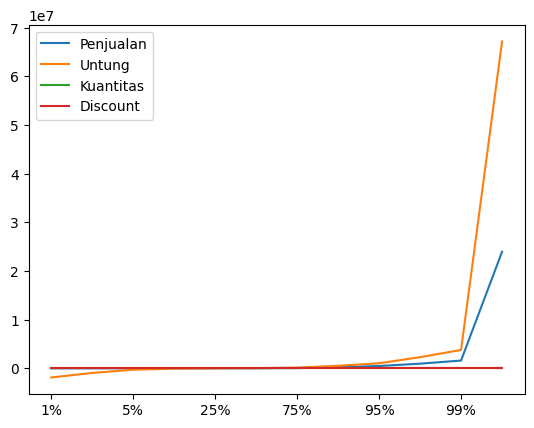

In [ ]:
# kita mencoba dari persentil nya
analisis.describe(percentiles =[0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.98,0.99])[4:].plot()

Kita bisa simpulkan dari grafik di atas ada periubahan yang signifikan di atas persentil 99%. Maka info ini dapat mempermudah kita dalam mengidentifikasi bahwa adanya outliers di atas percentiles 99%. 

In [12]:
dfx= df[(df.Penjualan < 1.603136e+06 ) & (df.Untung < 3.780067e+06) ]        # coba2 pake dfx
print(dfx.describe())

             Index      Kode_pos     Penjualan    Kuantitas     Discount  \
count  9808.000000   9808.000000  9.808000e+03  9808.000000  9808.000000   
mean   4998.643352  55191.163846  7.367239e+04     3.749796     0.155994   
std    2882.606012  32064.503547  1.778443e+05     2.195781     0.206989   
min       1.000000   1040.000000  3.000000e+00     1.000000     0.000000   
25%    2497.750000  23223.000000  2.432000e+03     2.000000     0.000000   
50%    5001.500000  56831.500000  1.048500e+04     3.000000     0.200000   
75%    7494.250000  90008.000000  4.880100e+04     5.000000     0.200000   
max    9994.000000  99301.000000  1.598058e+06    14.000000     0.800000   

             Untung  
count  9.808000e+03  
mean   1.027015e+05  
std    8.234610e+05  
min   -3.839990e+07  
25%    2.253250e+03  
50%    3.601800e+04  
75%    1.431778e+05  
max    3.779946e+06  


<Axes: >

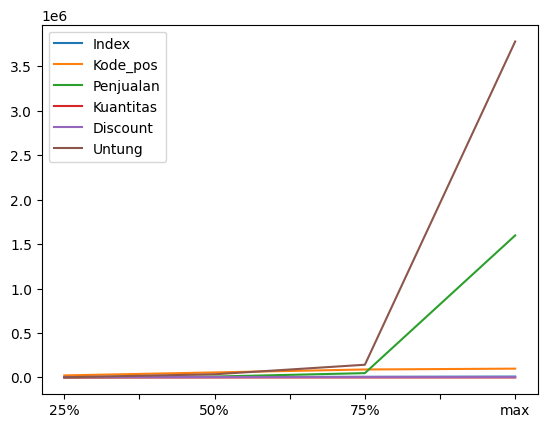

In [ ]:
dfx.describe()[4:].plot()

Handling Outlier Kedua

In [13]:
dfx1 = dfx[(dfx.Penjualan < 4.880100e+04 ) & (dfx.Untung <  1.431778e+05) ]        # coba2 pake dfx
print(dfx1.describe())

             Index      Kode_pos     Penjualan    Kuantitas     Discount  \
count  5911.000000   5911.000000   5911.000000  5911.000000  5911.000000   
mean   5019.398579  55244.626290   8859.517171     3.448824     0.167222   
std    2890.344236  31890.880688  11244.986756     1.950585     0.232573   
min       3.000000   1040.000000      3.000000     1.000000     0.000000   
25%    2515.500000  23320.000000   1272.000000     2.000000     0.000000   
50%    5002.000000  59715.000000   3444.000000     3.000000     0.000000   
75%    7536.500000  90004.000000  12339.000000     5.000000     0.200000   
max    9994.000000  99301.000000  48792.000000    14.000000     0.800000   

             Untung  
count  5.911000e+03  
mean   1.315261e+04  
std    1.409473e+05  
min   -5.337325e+06  
25%    1.538500e+03  
50%    1.614600e+04  
75%    5.216400e+04  
max    1.430750e+05  


Handling outlier dilakukan dua kali, namun sebanyak 4000 data yang hilang

<Axes: >

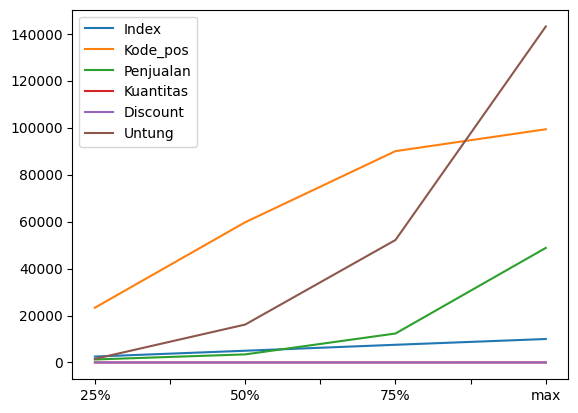

In [ ]:
dfx1.describe()[4:].plot()

Data sudah tidak berubah sesignifikan sebelumnya

### FEATURE ENGINEERING

In [14]:
df2= dfx1.copy()        # df2 = dataframe untuk RFM analysis
print(df2.describe())

             Index      Kode_pos     Penjualan    Kuantitas     Discount  \
count  5911.000000   5911.000000   5911.000000  5911.000000  5911.000000   
mean   5019.398579  55244.626290   8859.517171     3.448824     0.167222   
std    2890.344236  31890.880688  11244.986756     1.950585     0.232573   
min       3.000000   1040.000000      3.000000     1.000000     0.000000   
25%    2515.500000  23320.000000   1272.000000     2.000000     0.000000   
50%    5002.000000  59715.000000   3444.000000     3.000000     0.000000   
75%    7536.500000  90004.000000  12339.000000     5.000000     0.200000   
max    9994.000000  99301.000000  48792.000000    14.000000     0.800000   

             Untung  
count  5.911000e+03  
mean   1.315261e+04  
std    1.409473e+05  
min   -5.337325e+06  
25%    1.538500e+03  
50%    1.614600e+04  
75%    5.216400e+04  
max    1.430750e+05  


In [15]:
#Melihat jumlah produk, jumlah transaksi, dan pelanggan
cust_x_prod = pd.DataFrame([{'products':len(df2['ID_produk'].value_counts()),
'transactions': len(df2['ID_pesanan'].value_counts()),
'customers': len(df2['ID_pelanggan'].value_counts()),}], 
columns = ['products', 'transactions', 'customers'], index = ['quantity'])
print(cust_x_prod)

          products  transactions  customers
quantity      1452          3742        787


#### Mengubah format kolom waktu

In [ ]:
import datetime as dt

df2['Tanggal_pesan'] = pd.DatetimeIndex(df2.Tanggal_pesan).date


In [ ]:
df2.head(2)

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.0,68714.0
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,0.2,25164.0


In [ ]:
# kapan terakir ada transaksi?
df2['Tanggal_pesan'].max()

datetime.date(2017, 12, 30)

In [ ]:
now = dt.date(2017, 12, 30 )
print(now)

2017-12-30


### MODELING

#### Recency

In [ ]:
# Groupby berdasarkan Customer terakhir membeli

recency_df = df2.groupby(['ID_pelanggan'], as_index=False)['Tanggal_pesan'].max()
recency_df.columns = ['ID_pelanggan', 'LastPurchaseDate']
recency_df.head()

,ID_pelanggan,LastPurchaseDate
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2017-11-05
4,AB-10015,2014-03-07


In [ ]:
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,ID_pelanggan,LastPurchaseDate,Recency
0,AA-10315,2017-06-29,184
1,AA-10375,2017-12-11,19
2,AA-10480,2017-04-15,259
3,AA-10645,2017-11-05,55
4,AB-10015,2014-03-07,1394


#### Frequency

In [ ]:
# Periksa frekuensi pelanggan untuk berapa kali transaksi

frequency_df = df2.copy()



In [ ]:
# menghapus kolom yang duplikat
frequency_df.drop_duplicates(subset=['ID_pelanggan', 'ID_pesanan'], keep='first', inplace=True)

frequency_df = frequency_df.groupby('ID_pelanggan', as_index=False)['ID_pesanan'].count()
frequency_df.columns = ['ID_pelanggan', 'Frequency']
frequency_df.head()

,ID_pelanggan,Frequency
0,AA-10315,4
1,AA-10375,9
2,AA-10480,4
3,AA-10645,4
4,AB-10015,2


In [ ]:
frequency_df.shape

(787, 2)

#### Monetary

In [ ]:
df2['Total_cost'] = df2['Penjualan'] * df2['Kuantitas']
df2.head(2)

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,...,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,Total_cost
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.0,68714.0,2924.0
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,0.2,25164.0,44736.0


In [ ]:
monetary_df = df2.groupby('ID_pelanggan', as_index=False)['Total_cost'].sum()
monetary_df.columns = ['ID_pelanggan', 'Monetary']
monetary_df.head()

,ID_pelanggan,Monetary
0,AA-10315,155484.0
1,AA-10375,253407.0
2,AA-10480,137277.0
3,AA-10645,77262.0
4,AB-10015,152224.0


#### RFM

In [ ]:
# combine Recency and Frequency First
rf = recency_df.merge(frequency_df, left_on='ID_pelanggan', right_on='ID_pelanggan')
rf.head()

,ID_pelanggan,LastPurchaseDate,Recency,Frequency
0,AA-10315,2017-06-29,184,4
1,AA-10375,2017-12-11,19,9
2,AA-10480,2017-04-15,259,4
3,AA-10645,2017-11-05,55,4
4,AB-10015,2014-03-07,1394,2


In [ ]:
rfm = rf.merge(monetary_df, left_on='ID_pelanggan', right_on="ID_pelanggan")
rfm.set_index('ID_pelanggan', inplace = True )
rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
ID_pelanggan,,,,
AA-10315,2017-06-29,184,4,155484.0
AA-10375,2017-12-11,19,9,253407.0
AA-10480,2017-04-15,259,4,137277.0
AA-10645,2017-11-05,55,4,77262.0
AB-10015,2014-03-07,1394,2,152224.0


In [ ]:
rfm.drop(columns=['LastPurchaseDate'], inplace=True)
rfm.head()

,Recency,Frequency,Monetary
ID_pelanggan,,,
AA-10315,184,4,155484.0
AA-10375,19,9,253407.0
AA-10480,259,4,137277.0
AA-10645,55,4,77262.0
AB-10015,1394,2,152224.0


### EVALUATION

### EDA

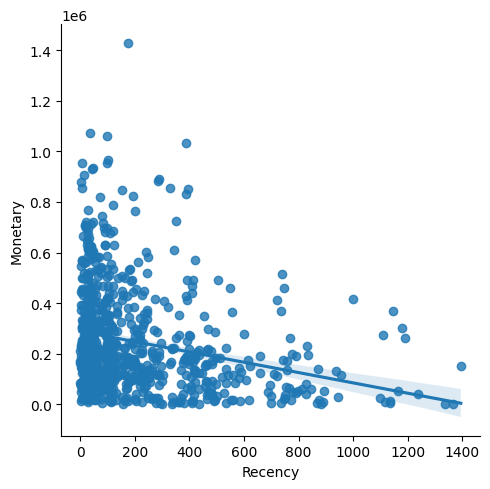

In [ ]:
# Monetary vs Recency
sns.lmplot(x = 'Recency', y = 'Monetary', data=rfm, fit_reg=True)

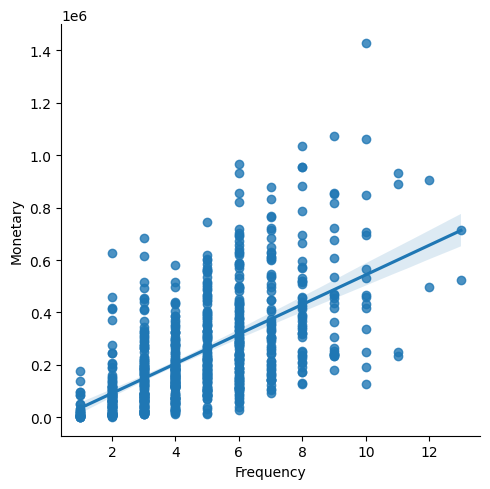

In [ ]:
# Monetary vs Frequency
sns.lmplot(x='Frequency', y = 'Monetary', data=rfm, fit_reg=True)

### RFM ANALYSIS

In [ ]:
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,Recency,Frequency,Monetary
0.25,38.5,3.0,93236.0
0.50,102.0,5.0,189083.0
0.75,277.5,6.0,346249.0


#### Scoring

In [ ]:
RFMScores = rfm.copy()

#Recency Scoring
def Rscoring(x,p,d):
   if x <= d[p][0.25]:
      return 1
   elif x <= d[p][0.50]:
      return 2
   elif x <= d[p][0.75]:
      return 3
   else:
      return 4

#Frequency and Monetary Scoring
def FMscoring (x,p,d):
   if x <= d[p][0.25]:
      return 4
   elif x <= d[p][0.50]:
      return 3
   elif x <= d[p][0.75]:
      return 2
   else:
      return 1


RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary',quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
print(RFMScores.head())

              Recency  Frequency  Monetary  R  F  M RFMgroup  Score
ID_pelanggan                                                       
AA-10315          184          4  155484.0  3  3  3      333      9
AA-10375           19          9  253407.0  1  1  2      112      4
AA-10480          259          4  137277.0  3  3  3      333      9
AA-10645           55          4   77262.0  2  3  4      234      9
AB-10015         1394          2  152224.0  4  4  3      443     11


#### Segmentation using K-Means

<ipython-input-37-559f9f4c9e20>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
<ipython-input-37-559f9f4c9e20>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label"

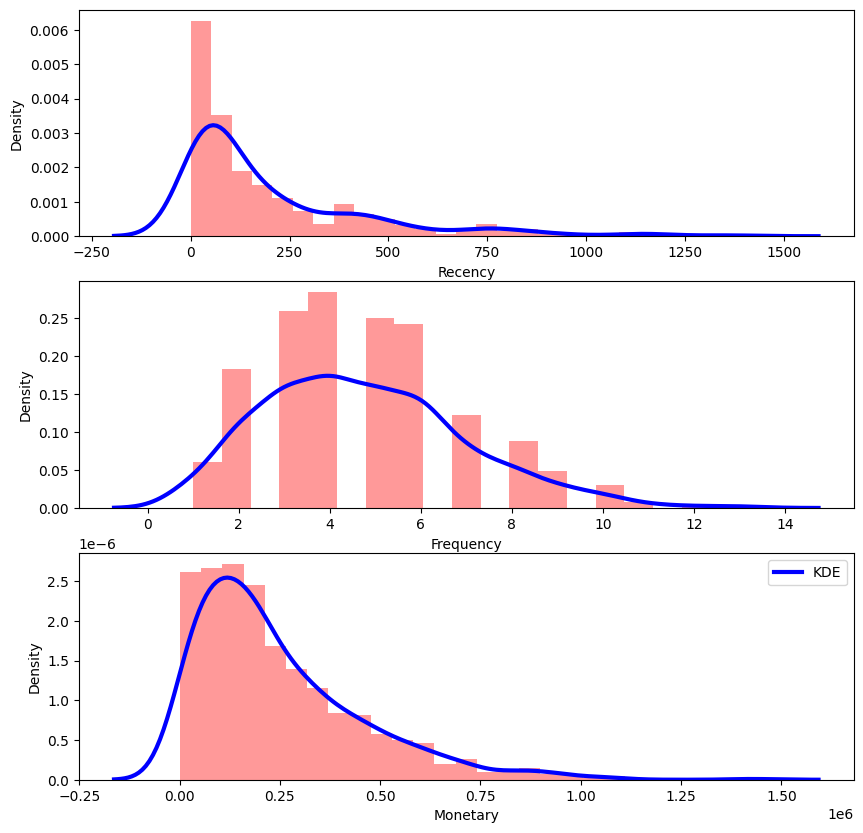

In [ ]:
#Melihat distibusi data hasil RFMScore
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

In [ ]:
# Melakukan scaling karena data tidak seimbang

clustering_rfm = rfm[['Recency', 'Frequency', 'Monetary']].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
ID_pelanggan,,,
AA-10315,184,4,155484.0
AA-10375,19,9,253407.0
AA-10480,259,4,137277.0
AA-10645,55,4,77262.0
AB-10015,1394,2,152224.0


In [ ]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_rfm)

data_scaled = pd.DataFrame(x_scaled, columns = ['Recency', 'Frequency', 'Monetary'])
data_scaled.head()

,Recency,Frequency,Monetary
0,0.131994,0.250000,0.108156
1,0.013630,0.666667,0.176773
2,0.185796,0.250000,0.095398
3,0.039455,0.250000,0.053345
4,1.000000,0.083333,0.105872


Karena kita ingin membagi hanya menjadi 3 cluster, maka kita langsung gunakan k = 3. Tidak perlu elbow atau silhouette score untuk mengetahui nilai k

NAMUN, ada baiknya kita tahu pada k berapa dia optimal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

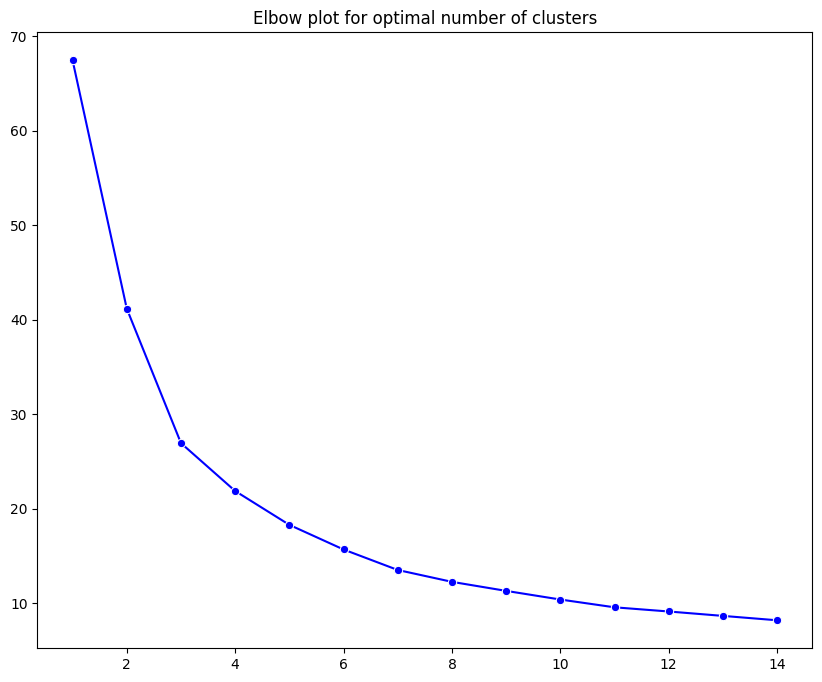

In [ ]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled)
    wscc.append(kmeans.inertia_)  

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,15),y=wscc,marker="o",c='blue')
plt.title("Elbow plot for optimal number of clusters")

Ternyata kebetulan k optimal ada pada k = 3

In [ ]:
# Clustering dengan menggunakan K-Means

kmeans = KMeans(n_clusters = 3, random_state = 0, init= 'k-means++',
                n_init = 10, max_iter = 300).fit(data_scaled)

pred = kmeans.predict(data_scaled)
RFMScores['Cluster'] = kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
ID_pelanggan,,,,,,,,,
AA-10315,184,4,155484.0,3,3,3,333,9,0
AA-10375,19,9,253407.0,1,1,2,112,4,2
AA-10480,259,4,137277.0,3,3,3,333,9,0
AA-10645,55,4,77262.0,2,3,4,234,9,0
AB-10015,1394,2,152224.0,4,4,3,443,11,1
AB-10060,54,7,143763.0,2,1,3,213,6,2
AB-10105,41,6,346337.0,2,2,1,221,5,2
AB-10150,41,4,161102.0,2,3,3,233,8,0
AB-10165,25,7,629505.0,1,1,1,111,3,2


In [ ]:
# Ringkasan tiap cluster
RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)

<ipython-input-42-a2c5cbb2c8ad>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)


,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
1,627.506849,2.664384,118893.575342,4.000000,3.773973,3.232877,11.006849
0,107.887781,4.022444,167999.640898,2.194514,3.197007,2.870324,8.261845
2,104.662500,7.250000,457830.116667,2.091667,1.475000,1.437500,5.004167


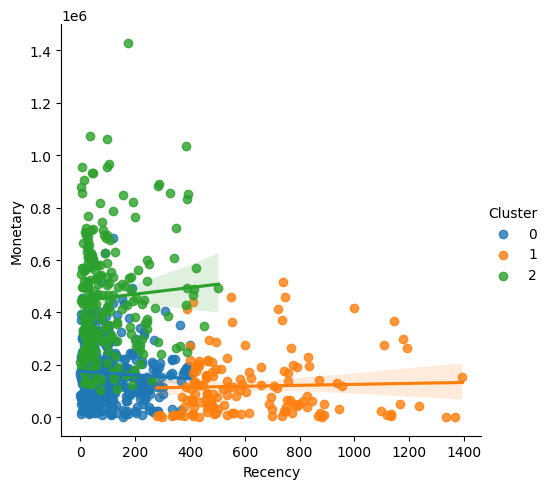

In [ ]:
# Ringkasan untuk Monetary vs Recency dalam bentuk grafik
sns.lmplot(x='Recency', y='Monetary', data=RFMScores, hue='Cluster', fit_reg=True)

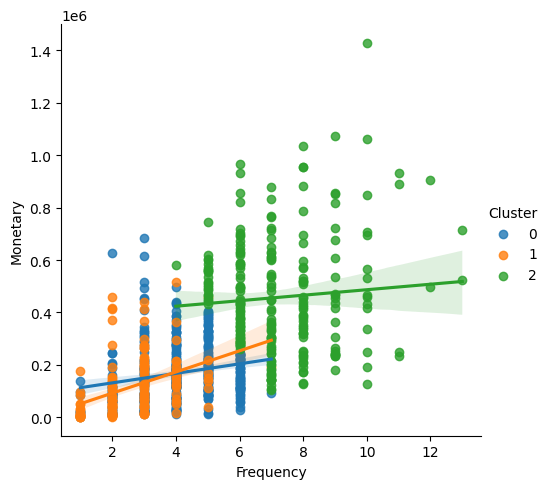

In [ ]:
# Ringkasan untuk Monetary vs Frequency dalam bentuk grafik
sns.lmplot(x='Frequency', y='Monetary', data=RFMScores, hue='Cluster')

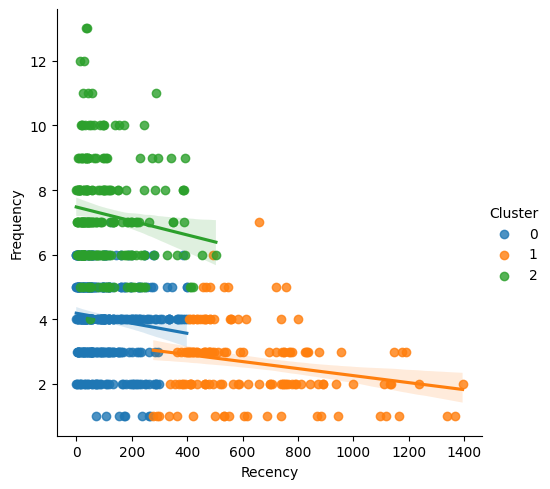

In [ ]:
# Ringkasan untuk Recency vs Frequency dalam bentuk grafik
sns.lmplot(x='Recency', y='Frequency', data=RFMScores, hue='Cluster', fit_reg=True)

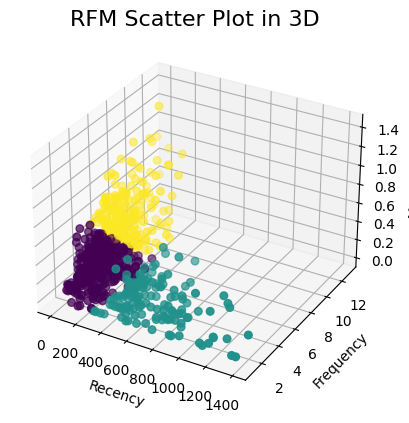

In [ ]:
# Plot 3D RFM
ax = plt.axes(projection='3d')
ax.scatter3D(RFMScores['Recency'],
             RFMScores['Frequency'], 
             RFMScores['Monetary'], 
             s=30, c = RFMScores['Cluster'])

plt.title('RFM Scatter Plot in 3D', fontsize=16)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

### KESIMPULAN/SARAN

Berdasarkan grafik di atas, telah terbagi menjadi 3 Cluster. 
- Cluster 1 adalah cluster customer yang berdasarkan frequency jarang melakukan transaksi dan berdasarkan monetary sedikit pengeluaran dalam berbelanja.

- Cluster 0 adalah cluster customer yang berdasarkan frequency mulai sering dalam melakukan transaksi dan berdasarkan monetary pengeluarannya mulai dari rendah ke sedang. 

- Cluster 2 adalah cluster customer yang berdasarkan frequency sangat sering dalam melakukan transaksi dan berdasarkan monetary pengeluarnnya mulai dari sedang ke tinggi.


Maka dari itu, pembagian promo beserta alasannya sebagai berikut.

- Pelanggan silver diisi oleh Cluster 1, karena Cluster 1 adalah kelompok pelanggan yang jarang berbelanja dan mengeluarkan sedikit uang untuk berbelanja. Pelanggan silver akan diberikan promo kecil. 

- Pelanggan Gold diisi oleh Cluster 0 karena Cluster 0 adalah kelompok pelanggan di antara pelanggan Silver dan Platinum. Pelanggan Gold akan diberikan promo sedang.

- Pelanggan Platinum diisi oleh Cluster 2 karena Cluster 2 adalah kelompok pelanggan yang sering berbelanja dan mengeluarkan uang yang besar untuk berbelanja. Pelanggan Platinum akan diberikan promo besar.